# Name-SHIVESH CHANDRA
# REGISTRATION NUMBER-200968230
# LAB 2 EXERCISE 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
bwd = pd.read_csv("bollywood.csv")

In [2]:
#Analysis on the bollywood dataset
bwd

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [3]:
#1.Total records in the dataset
len(bwd.index)

149

In [4]:
#2.Total Movies in each genre
bwd['Genre'] = bwd['Genre'].str.strip()
bwd['Genre'].value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [5]:
#3.Genre having lowest number of releases
bwd['Genre'].value_counts().index[4]

'Action'

In [6]:
#4.Movies released in different time
pd.crosstab(bwd['Genre'], bwd['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [7]:
#5.Month having max movie releases
bwd['Release Date'] = pd.to_datetime(bwd['Release Date'])
bwd['Month'] = pd.to_datetime(bwd['Release Date']).dt.month_name(locale = 'English')
bwd['Month'].value_counts()
bwd['Month'].value_counts().index[0]

'January'

In [8]:
#6.Month with movie budget >=25 crores
bwd[bwd['Budget'] >= 25]['Month'].value_counts().idxmax()

'February'

In [9]:
#7.Calculate ROI and find top 10 movies with max ROI
ROI = (bwd['BoxOfficeCollection']-bwd['Budget'])/bwd['Budget']
bwd['ROI']= ROI
bwd.nlargest(10, 'ROI')

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
64,65,2013-04-26,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,April,8.166667
89,90,2014-12-19,PK,HS,Drama,85,735.0,13270623,43767,5693,December,7.647059
132,133,2013-09-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,September,7.514286
135,136,2013-09-20,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,September,7.500000
87,88,2013-06-14,Fukrey,N,Comedy,5,36.2,227912,222,39,June,6.240000
58,59,2014-09-05,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,September,5.933333
128,129,2013-10-18,Shahid,FS,Drama,6,40.0,1148516,3155,396,October,5.666667
37,38,2014-07-11,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,July,5.500000
101,102,2013-07-12,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,July,4.466667
115,116,2013-08-09,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,August,4.266667


In [10]:
#8. Average ROI for different release times
bwd.groupby("ReleaseTime")['ROI'].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

In [11]:
#9. Correlation between BoxOfficeCollection and YoutubeLikes
bwd['BoxOfficeCollection'].corr(bwd['YoutubeLikes'])

0.6825165877731297

In [12]:
print("correlation is positive")

correlation is positive


<AxesSubplot:title={'center':'YoutubeLikes'}, xlabel='Genre'>

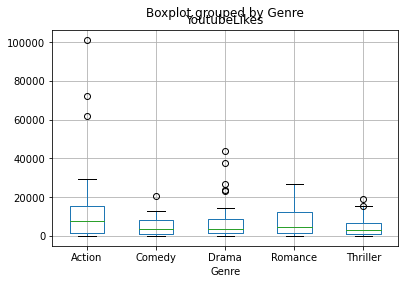

In [13]:
#10. Boxplot to see which genre
bwd.boxplot(by="Genre" , column=['YoutubeLikes'])

In [14]:
print("Action has more youtube likes")

Action has more youtube likes


In [15]:
#11. Which of Budget, BoxOfficeCollection, YoutubeViews, YoutubeLikes, YoutubeDislikes are highly correlated
bwd.corr()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ROI
SlNo,1.000000,0.116899,0.036908,0.025027,0.018163,0.035949,0.037314
Budget,0.116899,1.000000,0.650401,0.589038,0.608916,0.665343,0.072050
BoxOfficeCollection,0.036908,0.650401,1.000000,0.588632,0.682517,0.623941,0.585042
YoutubeViews,0.025027,0.589038,0.588632,1.000000,0.884055,0.846739,0.252847
YoutubeLikes,0.018163,0.608916,0.682517,0.884055,1.000000,0.859730,0.291302
YoutubeDislikes,0.035949,0.665343,0.623941,0.846739,0.859730,1.000000,0.201533
ROI,0.037314,0.072050,0.585042,0.252847,0.291302,0.201533,1.000000


In [16]:
print("YoutubeViews and YoutubeLikes are highly correlated , correlation is 0.859730 ")

YoutubeViews and YoutubeLikes are highly correlated , correlation is 0.859730 


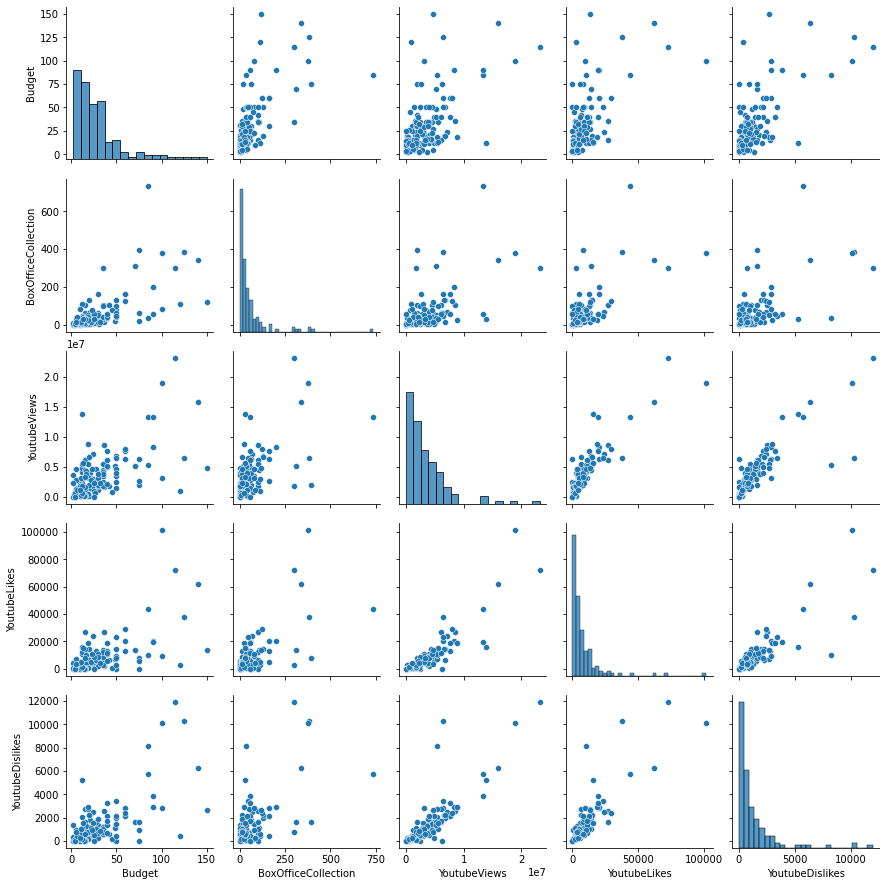

In [17]:
#11. Pair plot
sns.pairplot(bwd, vars = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes'])

<AxesSubplot:>

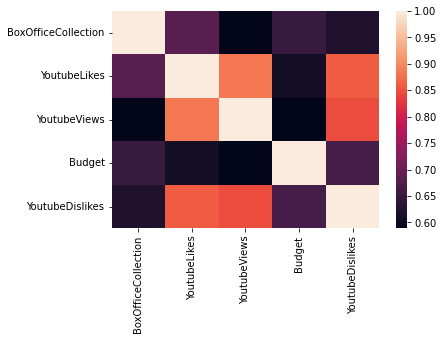

In [18]:
#heatmap
import seaborn as sns

corr = bwd[['BoxOfficeCollection', 'YoutubeLikes', 'YoutubeViews', 'Budget', 'YoutubeDislikes']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [19]:
print ("From this we can see that YoutubeViews and YoutubeLikes are highly correlated")

From this we can see that YoutubeViews and YoutubeLikes are highly correlated


In [20]:
#12. Genre and Boxoffice Collection during 2013-15
bwd.groupby('Genre')['BoxOfficeCollection'].sum()

Genre
Action      2200.34
Comedy      1660.14
Drama       2302.76
Romance     1321.03
Thriller     810.15
Name: BoxOfficeCollection, dtype: float64

<AxesSubplot:title={'center':'Box Office Collection and Genre'}, xlabel='Genre', ylabel='Box Office Collection'>

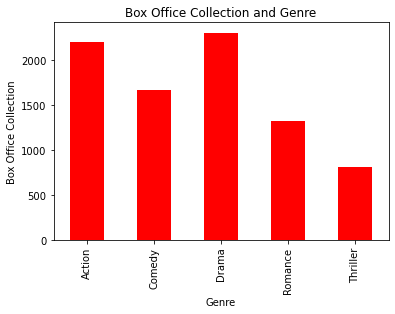

In [21]:
#12. Barplot to visualize Genre and Boxoffice Collection during 2013-15
bwd.groupby(['Genre'])['BoxOfficeCollection'].agg('sum').plot(kind = 'bar', xlabel='Genre', ylabel='Box Office Collection', color='red', title='Box Office Collection and Genre')

<AxesSubplot:title={'center':'Total budget and box office collection for each genre'}, xlabel='Genre', ylabel='Budget and Box Office Collection'>

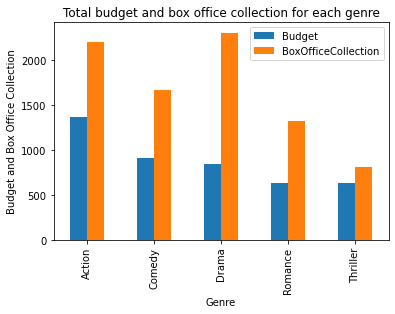

In [22]:
#13. Barplot to visualize Budget and Box office collection based on Genre
bwd.groupby(['Genre'])[['Budget','BoxOfficeCollection']].agg('sum').plot(kind = 'bar', xlabel='Genre', ylabel='Budget and Box Office Collection', title='Total budget and box office collection for each genre')

In [23]:
#14. Distribution of Movie Budget for every genre
bwd.groupby('Genre')['Budget'].sum()

Genre
Action      1367
Comedy       910
Drama        847
Romance      629
Thriller     634
Name: Budget, dtype: int64

<AxesSubplot:title={'center':'Total budget for each genre'}, xlabel='Genre', ylabel='Budget(in crores)'>

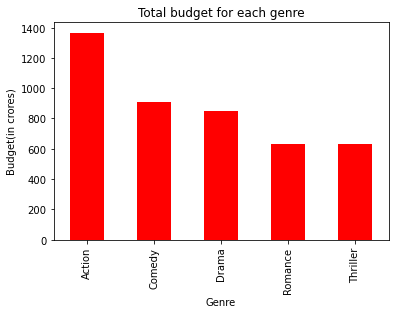

In [24]:
#14. 
bwd.groupby(['Genre'])['Budget'].agg('sum').plot(kind = 'bar', xlabel='Genre', ylabel='Budget(in crores)', color='red', title='Total budget for each genre')

In [25]:
#15. No. of movies released every year
bwd['Year'] = pd.to_datetime(bwd['Release Date']).dt.year
bwd.groupby("Year")['MovieName'].count()

Year
2013    67
2014    70
2015    12
Name: MovieName, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='No. of movies released'>

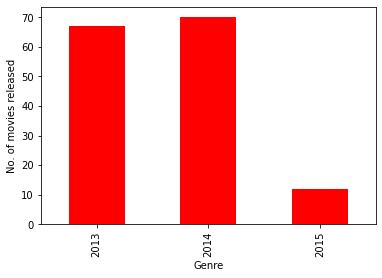

In [26]:
#15. Barplot to visualize the no. of movies released every year
bwd.groupby(['Year'])['MovieName'].agg('count').plot(kind = 'bar', xlabel='Genre', ylabel='No. of movies released', color='red')

In [27]:
print("Year 2014 has most number of movies released")

Year 2014 has most number of movies released
